#About Dataset
Dataset Overview 📝
This dataset includes key tourism and economic indicators for over 200 countries, spanning the years from 1999 to 2023. It covers a wide range of data related to tourism arrivals, expenditures, receipts, GDP, unemployment, and inflation, helping to explore the relationship between tourism and economic growth globally.

#Tourism & Economic Indicators:
tourism_receipts 💰: The total income a country generates from international tourism, measured in current US dollars.

tourism_arrivals 🌍: The total number of international tourists who arrive in a country, measured in count.

tourism_expenditures 🛍️: The amount of money spent by international tourists within the country, measured in current US dollars.

tourism_exports 📈: The percentage of a country’s total exports derived from international tourism receipts.

tourism_departures ✈️: The number of citizens or residents of a country who travel abroad for tourism.

tourism_expenditures 🛫: The percentage of a country’s total imports spent on international tourism.

gdp 📊: The total value of all goods and services produced in a country, expressed in current US dollars.

inflation 📉: The annual percentage change in the average price of goods and services in a country.

unemployment 👷‍♂️: The percentage of people within the labor force who are unemployed but actively seeking work.

Data Source 🌐
World Bank: The dataset is sourced from the World Bank’s economic and tourism databases, offering reliable and up-to-date statistics on global tourism and economic indicators.
#Potential Use Cases 🔍
Tourism & Economic Impact Analysis 🌏: Analyzing the contribution of tourism to a country’s GDP, as well as how tourism spending impacts national economies.

Cross-Country Comparison 📊: Comparing tourism arrivals, expenditures, and receipts relative to GDP and unemployment across countries and regions.

Predictive Modeling 🤖: Building models to predict the future impact of tourism on economic growth and identify emerging trends.

Policy Evaluation 🏛️: Helping policymakers assess the role of tourism in economic planning, especially regarding inflation and unemployment.

Economic Forecasting 📈: Using historical data to forecast how tourism will influence economic conditions, helping in the development of economic policies.

In [312]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For statistical plots
import geopandas as gpd  # For geospatial data processing
import plotly.express as px  # For interactive plots
from sklearn.preprocessing import StandardScaler  # For data scaling
from sklearn.cluster import KMeans  # For clustering
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For performance metrics
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor  # For ensemble regression models
from sklearn.svm import SVR  # For Support Vector Regressor
from sklearn.tree import DecisionTreeRegressor  # For decision tree regression
from statsmodels.tsa.arima.model import ARIMA  # For ARIMA models (time series forecasting)
from statsmodels.tsa.stattools import adfuller  # For ADF test (stationarity check)
from scipy.stats import ttest_ind  # For independent T-test
import xgboost as xgb  # For XGBoost (ensemble model)


In [313]:
# Load the dataset
file_path = '/content/world_tourism_economy_data.csv'  # Update with your actual file path
data = pd.read_csv(file_path)



In [276]:
data

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6645,Kosovo,XKX,2023,NaN,NaN,NaN,NaN,NaN,1.046822e+10,4.944324,NaN
6646,"Yemen, Rep.",YEM,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6647,South Africa,ZAF,2023,NaN,NaN,NaN,NaN,NaN,3.806993e+11,6.073909,32.098
6648,Zambia,ZMB,2023,NaN,NaN,NaN,NaN,NaN,2.757796e+10,10.884532,NaN


In [345]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

MessageError: Error: credential propagation was unsuccessful

In [314]:
data.info

<bound method DataFrame.info of                           country country_code  year  tourism_receipts  \
0                           Aruba          ABW  1999      7.820000e+08   
1     Africa Eastern and Southern          AFE  1999      8.034209e+09   
2                     Afghanistan          AFG  1999               NaN   
3      Africa Western and Central          AFW  1999      1.443613e+09   
4                          Angola          AGO  1999      3.100000e+07   
...                           ...          ...   ...               ...   
6645                       Kosovo          XKX  2023               NaN   
6646                  Yemen, Rep.          YEM  2023               NaN   
6647                 South Africa          ZAF  2023               NaN   
6648                       Zambia          ZMB  2023               NaN   
6649                     Zimbabwe          ZWE  2023               NaN   

      tourism_arrivals  tourism_exports  tourism_departures  \
0         9.720000e+05        62.542949                 NaN   
1         1.530938e+07        12.204030                 NaN   
2                  NaN              NaN                 NaN   
3         3.897975e+06         3.974476                 NaN   
4         4.500000e+04         0.583858                 NaN   
...                ...              ...                 ...   
6645               NaN              NaN                 NaN   
6646               NaN              NaN                 NaN   
6647               NaN              NaN                 NaN   
6648               NaN              NaN                 NaN   
6649               NaN              NaN                 NaN   

      tourism_expenditures           gdp   inflation  unemployment  
0                 9.495387  1.722905e+09    2.280372           NaN  
1                 7.760536  2.654293e+11    7.819865           NaN  
2                      NaN           NaN         NaN           NaN  
3                 6.147291  1.394683e+11    0.372266           NaN  
4                 2.489638  6.152923e+09  248.195902           NaN  
...                    ...           ...         ...           ...  
6645                   NaN  1.046822e+10    4.944324           NaN  
6646                   NaN           NaN         NaN           NaN  
6647                   NaN  3.806993e+11    6.073909        32.098  
6648                   NaN  2.757796e+10   10.884532           NaN  
6649                   NaN  3.523137e+10         NaN         9.348  

[6650 rows x 11 columns]>

In [315]:
data.describe()

,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
count,6650.000000,4.289000e+03,4.949000e+03,4114.000000,2.589000e+03,4173.000000,6.424000e+03,5668.000000,3658.000000
mean,2011.000000,3.062956e+10,6.263894e+07,15.506851,8.246093e+07,6.652740,2.089999e+12,6.319369,7.961191
std,7.211645,1.291076e+11,2.049444e+08,17.758374,2.064665e+08,4.071632,7.761985e+12,18.682769,5.802565
min,1999.000000,1.000000e+05,9.000000e+02,0.000956,2.000000e+03,0.157818,1.396473e+07,-16.859691,0.039000
25%,2005.000000,2.690000e+08,5.290000e+05,4.657732,1.051000e+06,4.074702,6.087182e+09,1.865425,4.250000
50%,2011.000000,1.553000e+09,2.508000e+06,8.306797,4.634000e+06,5.754790,3.681803e+10,3.629433,6.548000
75%,2017.000000,9.144227e+09,1.818000e+07,18.506710,4.508703e+07,7.985102,4.266977e+11,6.563197,9.894692
max,2023.000000,1.863069e+12,2.403074e+09,101.966999,2.034432e+09,28.192276,1.061717e+14,557.201817,57.000000


In [316]:
# Check for missing values
print("Missing Values: \n", data.isnull().sum())



Missing Values: 
 country                    0
country_code               0
year                       0
tourism_receipts        2361
tourism_arrivals        1701
tourism_exports         2536
tourism_departures      4061
tourism_expenditures    2477
gdp                      226
inflation                982
unemployment            2992
dtype: int64


In [328]:
data['tourism_receipts'] = data['tourism_receipts'].fillna(method='ffill')
data['tourism_arrivals'] = data['tourism_arrivals'].fillna(method='ffill')
data['tourism_exports'] = data['tourism_exports'].fillna(method='ffill')
data['tourism_departures'] = data['tourism_departures'].fillna(method='ffill')
data['tourism_expenditures'] = data['tourism_expenditures'].fillna(method='ffill')
data['gdp'] = data['gdp'].fillna(data['gdp'].mean())
data['inflation'] = data['inflation'].fillna(data['inflation'].mean())
data['unemployment'] = data['unemployment'].fillna(data['unemployment'].mean())


<ipython-input-328-9c1caa3d81f2>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['tourism_receipts'] = data['tourism_receipts'].fillna(method='ffill')
<ipython-input-328-9c1caa3d81f2>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['tourism_arrivals'] = data['tourism_arrivals'].fillna(method='ffill')
<ipython-input-328-9c1caa3d81f2>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['tourism_exports'] = data['tourism_exports'].fillna(method='ffill')
<ipython-input-328-9c1caa3d81f2>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['tourism_departures'] = data['tourism_departures'].fillna(method='ffill')
<ipython-input

In [329]:
# Check for missing values
print("Missing Values: \n", data.isnull().sum())

Missing Values: 
 country                               0
country_code                          0
year                                  0
tourism_receipts                      0
tourism_arrivals                      0
tourism_exports                       0
tourism_departures                   13
tourism_expenditures                  0
gdp                                   0
inflation                             0
unemployment                          0
tourism_expenditures_percentage    2483
region                             6450
dtype: int64


#EDA



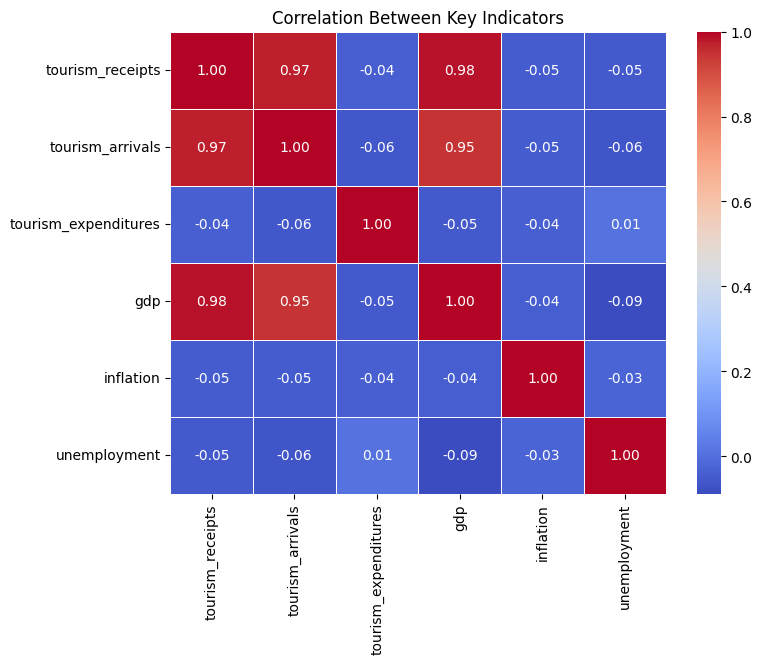

In [317]:
# Correlation heatmap
corr = data[['tourism_receipts', 'tourism_arrivals', 'tourism_expenditures', 'gdp', 'inflation', 'unemployment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Key Indicators')
plt.show()

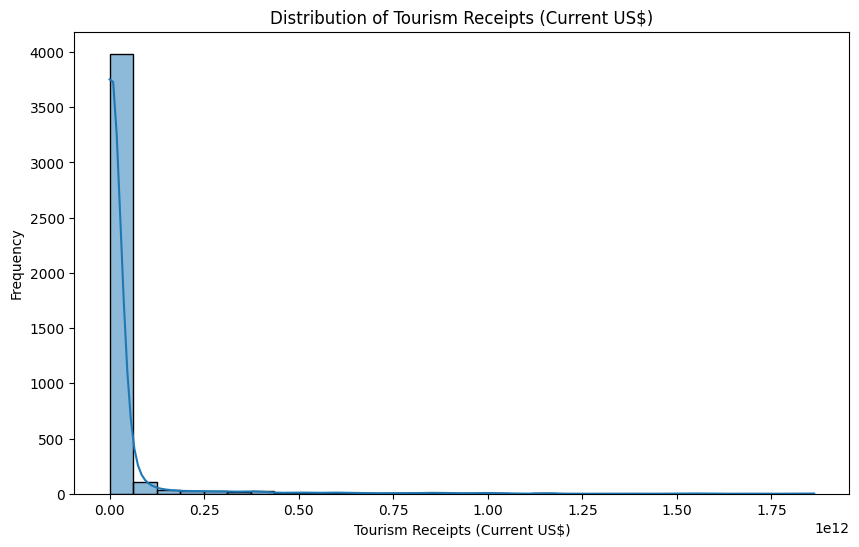

In [318]:
# Histogram for tourism receipts distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['tourism_receipts'], kde=True, bins=30)
plt.title('Distribution of Tourism Receipts (Current US$)')
plt.xlabel('Tourism Receipts (Current US$)')
plt.ylabel('Frequency')
plt.show()

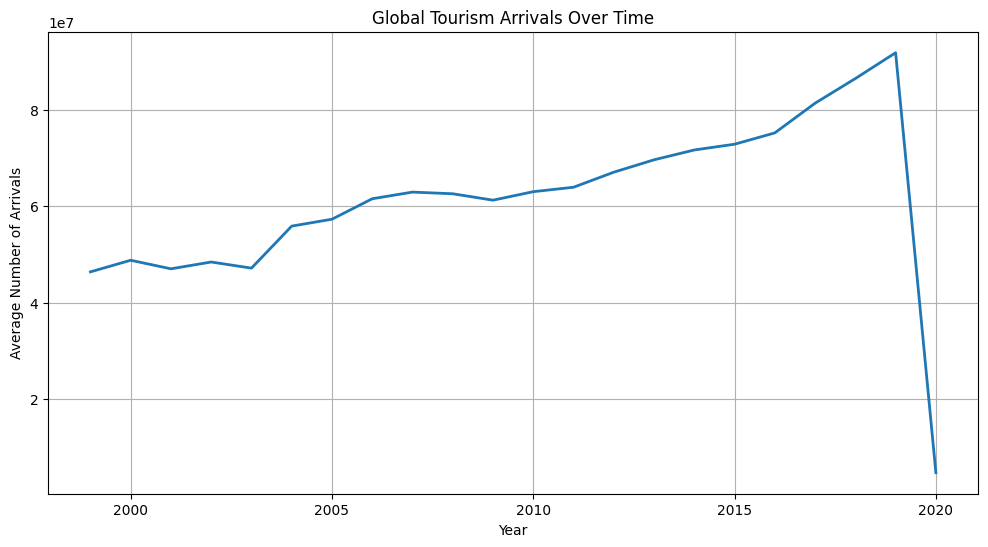

In [319]:
# Tourism arrivals over time (global average)
plt.figure(figsize=(12, 6))
global_tourism_arrivals = data.groupby('year')['tourism_arrivals'].mean()
global_tourism_arrivals.plot(kind='line', linewidth=2)
plt.title('Global Tourism Arrivals Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Arrivals')
plt.grid(True)
plt.show()

<ipython-input-320-8e9c27240995>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tourism_receipts.index, y=top_tourism_receipts.values, palette='pastel')


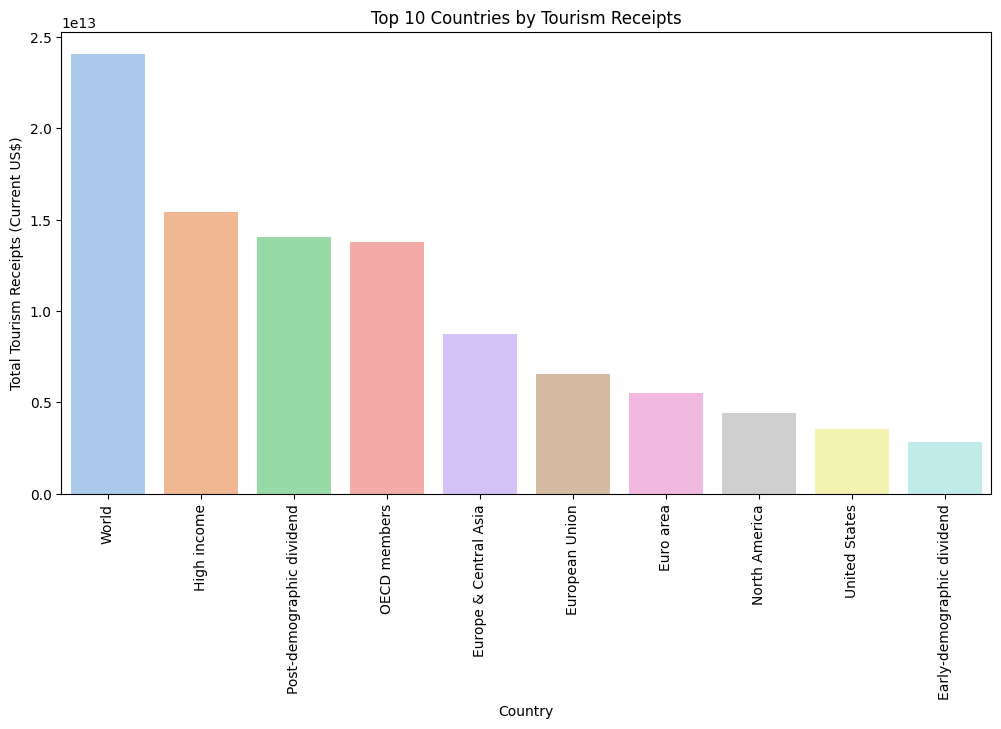

In [320]:
# Bar plot for Top 10 Countries by Tourism Receipts
top_tourism_receipts = data.groupby('country')['tourism_receipts'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_tourism_receipts.index, y=top_tourism_receipts.values, palette='pastel')
plt.title('Top 10 Countries by Tourism Receipts')
plt.xlabel('Country')
plt.ylabel('Total Tourism Receipts (Current US$)')
plt.xticks(rotation=90)
plt.show()

<ipython-input-321-3a4dcaf3bc43>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expenditure_unemployment.index, y=top_expenditure_unemployment.values, palette='viridis')


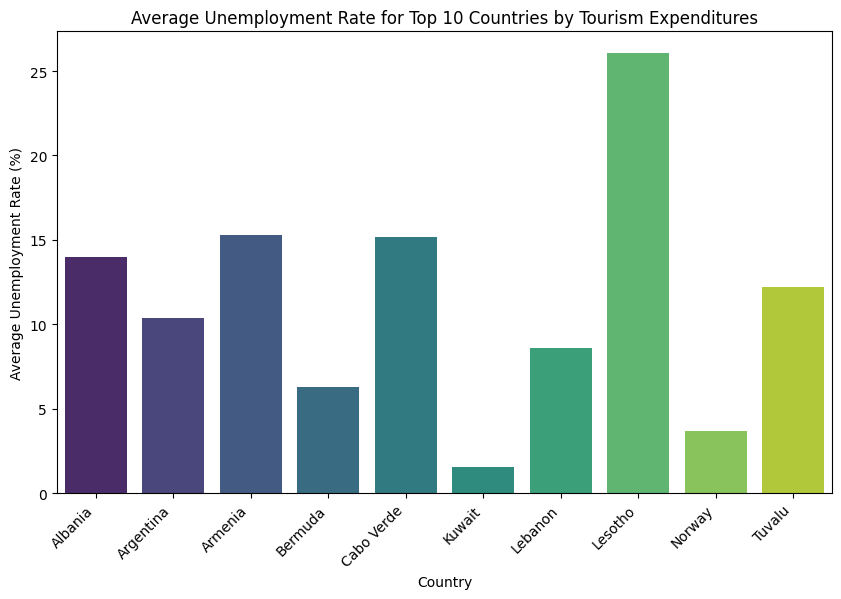

In [321]:
# Top 10 countries by tourism expenditures
top_expenditure_countries = data.groupby('country')['tourism_expenditures'].sum().sort_values(ascending=False).head(10)

# Calculate average unemployment for the top 10 countries
top_expenditure_unemployment = data[data['country'].isin(top_expenditure_countries.index)].groupby('country')['unemployment'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_expenditure_unemployment.index, y=top_expenditure_unemployment.values, palette='viridis')
plt.title('Average Unemployment Rate for Top 10 Countries by Tourism Expenditures')
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-322-b61593379d20>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tourism_expenditure_percentage.index, y=top_tourism_expenditure_percentage.values, palette='coolwarm')


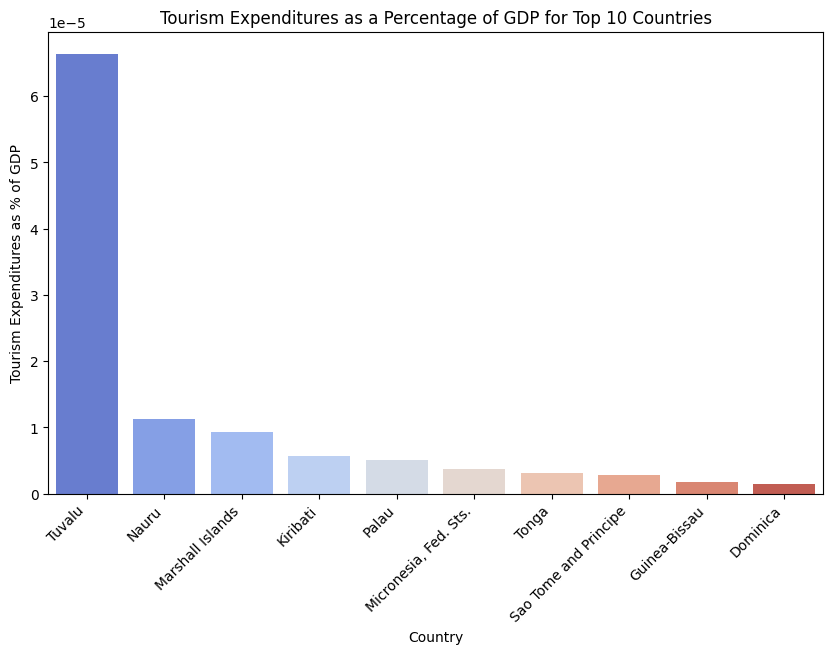

In [322]:
# Calculate tourism expenditures as a percentage of GDP
data['tourism_expenditures_percentage'] = (data['tourism_expenditures'] / data['gdp']) * 100

# Get the top 10 countries by tourism receipts
top_tourism_expenditure_percentage = data.groupby('country')['tourism_expenditures_percentage'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tourism_expenditure_percentage.index, y=top_tourism_expenditure_percentage.values, palette='coolwarm')
plt.title('Tourism Expenditures as a Percentage of GDP for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Tourism Expenditures as % of GDP')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-323-6bca016940a3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_tourism_receipts.index, y=region_tourism_receipts.values, palette='coolwarm')


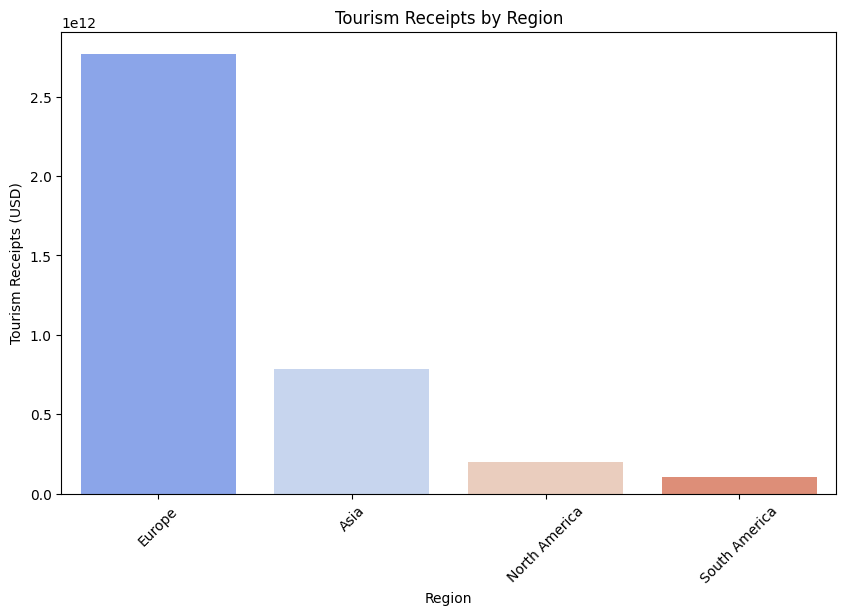

In [323]:
# Add a 'region' column manually (or use external data for countries' regions)
data['region'] = data['country'].map({
    'USA': 'North America', 'India': 'Asia', 'China': 'Asia', 'Germany': 'Europe',
    'Brazil': 'South America', 'France': 'Europe', 'Italy': 'Europe', 'Japan': 'Asia',
    'UK': 'Europe', 'Canada': 'North America'  # Add more regions accordingly
})

# Aggregate data by region for tourism receipts
region_tourism_receipts = data.groupby('region')['tourism_receipts'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_tourism_receipts.index, y=region_tourism_receipts.values, palette='coolwarm')
plt.title('Tourism Receipts by Region')
plt.xlabel('Region')
plt.ylabel('Tourism Receipts (USD)')
plt.xticks(rotation=45)
plt.show()

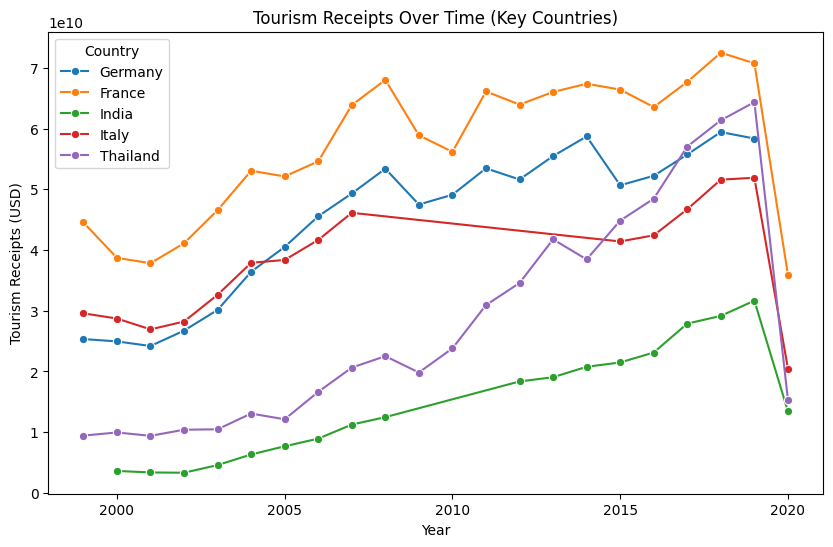

In [324]:
#The top  most visited countries in the world
key_countries = ['USA', 'France', 'Germany', 'India', 'Italy','Thailand','Turkey']

selected_data = data[data['country'].isin(key_countries)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=selected_data, x='year', y='tourism_receipts', hue='country', marker='o')
plt.title('Tourism Receipts Over Time (Key Countries)')
plt.xlabel('Year')
plt.ylabel('Tourism Receipts (USD)')
plt.legend(title='Country')
plt.show()

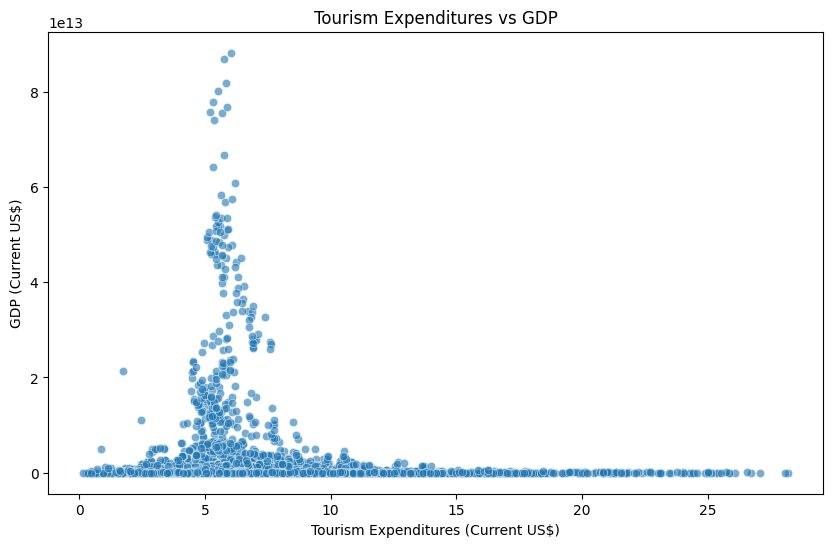

In [325]:
# Scatter plot of Tourism Expenditures vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tourism_expenditures', y='gdp', data=data, alpha=0.6)
plt.title('Tourism Expenditures vs GDP')
plt.xlabel('Tourism Expenditures (Current US$)')
plt.ylabel('GDP (Current US$)')
plt.show()

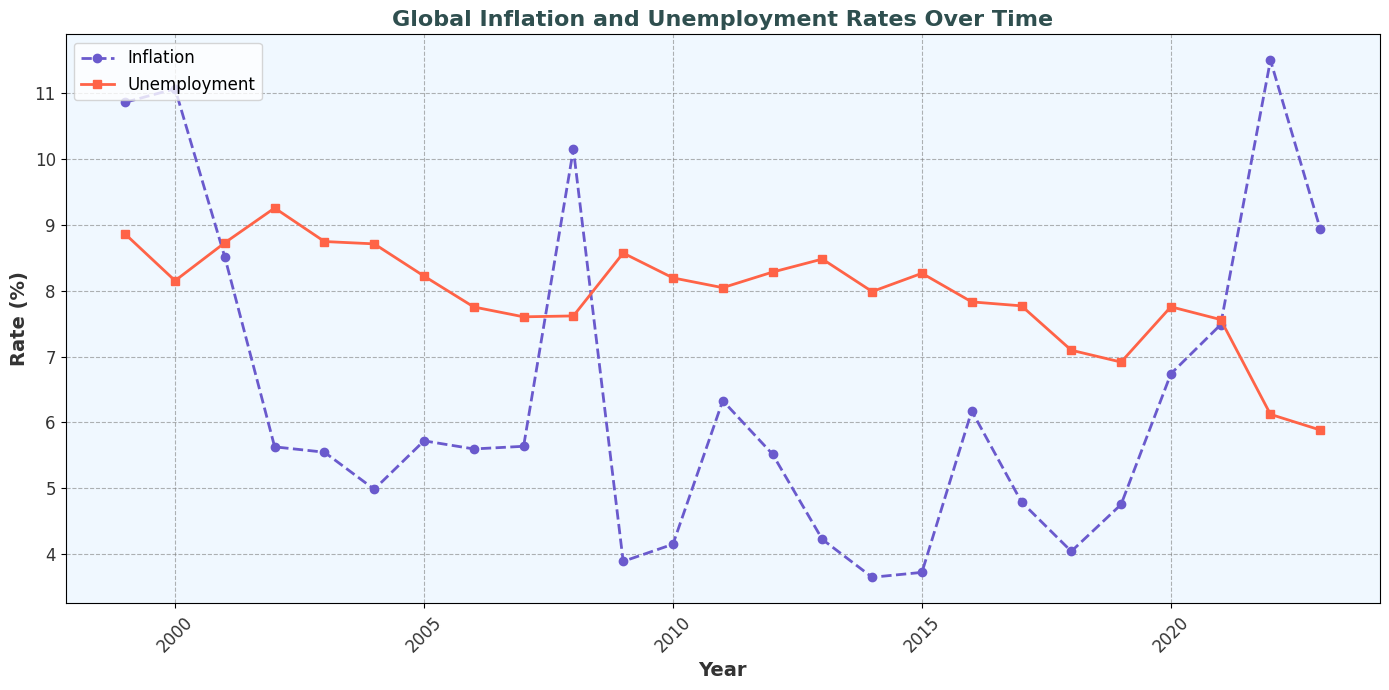

In [326]:
# Assuming 'df' is your DataFrame containing the data
# Group by 'year' and calculate the mean of inflation and unemployment
global_inflation = data.groupby('year')['inflation'].mean()
global_unemployment = data.groupby('year')['unemployment'].mean()

# Plotting both global inflation and unemployment rates over time
plt.figure(figsize=(14, 7), facecolor='white')

# Plot Inflation with a dashed line and circular markers
plt.plot(global_inflation, label='Inflation', color='#6A5ACD', linestyle='--', marker='o', markersize=6, linewidth=2)

# Plot Unemployment with a solid line and square markers
plt.plot(global_unemployment, label='Unemployment', color='#FF6347', linestyle='-', marker='s', markersize=6, linewidth=2)

# Title and labels with larger font size and customized font weight
plt.title('Global Inflation and Unemployment Rates Over Time', fontsize=16, fontweight='bold', color='#2F4F4F')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Rate (%)', fontsize=14, fontweight='bold', color='#333333')

# Add a legend with a larger font size and better placement
plt.legend(fontsize=12, loc='upper left')

# Adjust gridlines and make them lighter for better readability
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.6)

# Customize tick labels (for better clarity on the x-axis)
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Add a background color and improve aesthetics
plt.gca().set_facecolor('#F0F8FF')  # Light blue background

# Show the plot with a tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


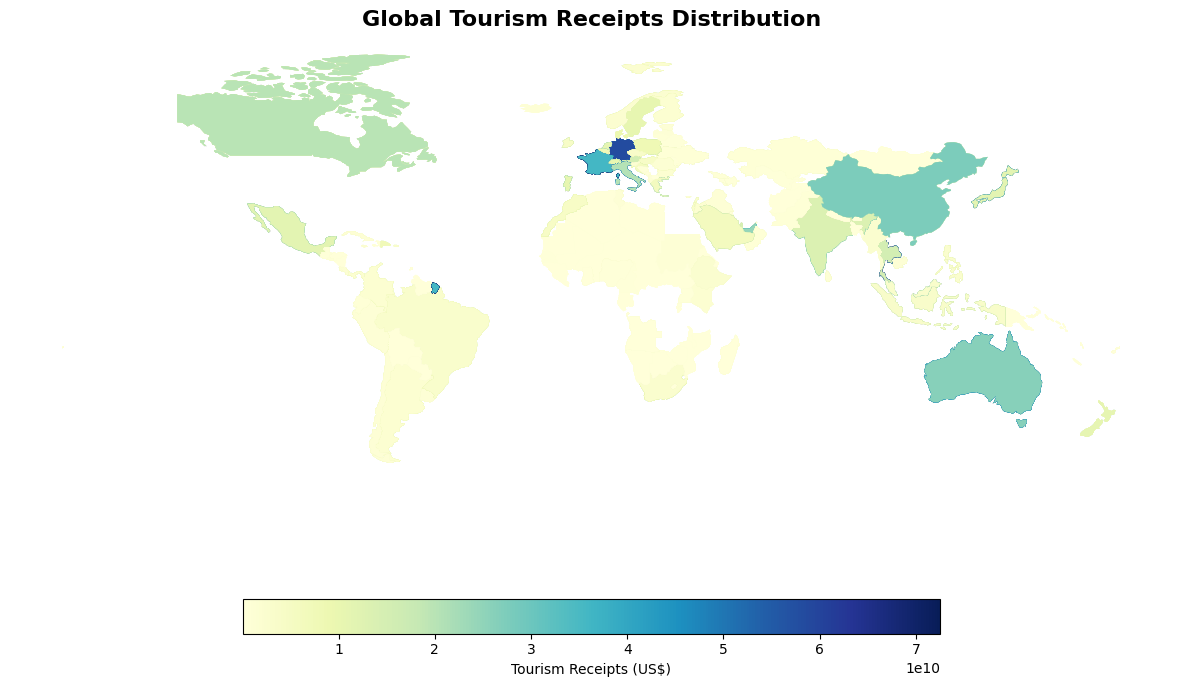

In [327]:
# Load your GeoDataFrame (assuming it's saved as a GeoJSON or similar file)
# Replace 'path_to_file.geojson' with the actual file path if needed.
geo_data_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
geo_data = gpd.read_file(geo_data_url)

# Example data structure for `df` with tourism receipts (ensure it matches your actual data)
# df = pd.DataFrame({
#     'country': ['Fiji', 'United Republic of Tanzania', 'Western Sahara'],
#     'tourism_receipts': [500000, 1200000, 10000]
# })

# Set up merging based on the `ADMIN` column in geo_data and the `country` column in df
merged = geo_data.set_index('ADMIN').join(data.set_index('country'))

# Plot the choropleth map with a different color scheme
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(
    column='tourism_receipts',
    ax=ax,
    legend=True,
    cmap='YlGnBu',  # Change color scheme here
    legend_kwds={'label': "Tourism Receipts (US$)", 'orientation': "horizontal", 'shrink': 0.6}
)

# Customize the plot
plt.title('Global Tourism Receipts Distribution', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()


#Linear Regression model

In [330]:
# Create DataFrame
df = pd.DataFrame(data)

# Fill missing values in features and target with means
X = df[['gdp', 'inflation', 'unemployment']].fillna(df[['gdp', 'inflation', 'unemployment']].mean())
y = df['tourism_receipts'].fillna(df['tourism_receipts'].mean())

# Train a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Output coefficients and intercept
print("Linear Regression Results:")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print("\n")

Linear Regression Results:
Model Coefficients: [ 1.00980863e-02 -8.22228491e+07  3.16204495e+05]
Model Intercept: 5755318848.545002




#ADF Test

In [332]:
# Extract 'tourism_receipts' for stationarity test
tourism_receipts = df['tourism_receipts']
# Perform Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series.dropna())  # Drop NaN values before the test
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] <= 0.05:
        print("The time series is likely stationary (reject H0).")
    else:
        print("The time series is likely non-stationary (fail to reject H0).")

# Perform ADF test on 'tourism_receipts'
adf_test(tourism_receipts)

ADF Statistic: -13.501698779465817
p-value: 2.9683622375612123e-25
Critical Values: {'1%': -3.4313389401937124, '5%': -2.8619770281142096, '10%': -2.5670026265519224}
The time series is likely stationary (reject H0).


Linear Regression

In [333]:
# Select features and target
X = df[['gdp', 'inflation', 'unemployment']]  # Features
y = df['tourism_receipts']  # Target variable

# Handle missing values for the regression model
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict tourism receipts
predicted_tourism_receipts = model.predict(X)

# Output coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [ 1.00980863e-02 -8.22228491e+07  3.16204495e+05]
Model Intercept: 5755318848.545002


#Arima Model

In [334]:
# Fit an ARIMA model
model = ARIMA(country_data['tourism_receipts'], order=(5,1,0))  # Example parameters
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 months/years
print(forecast)

266    2.184234e+11
267    2.767723e+11
268    2.586320e+11
269    1.141191e+11
270    1.248891e+11
271    1.732296e+11
272    2.110667e+11
273    1.983278e+11
274    1.720016e+11
275    1.586673e+11
276    1.734896e+11
277    1.858415e+11
Name: predicted_mean, dtype: float64


#K-means Clustering

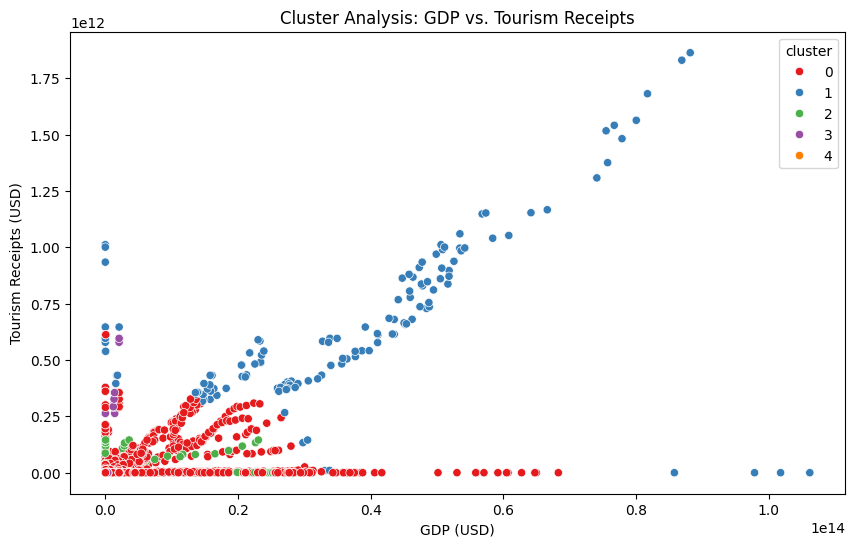

In [335]:
# Select relevant features for clustering
features = df[['tourism_receipts', 'tourism_arrivals', 'tourism_expenditures', 'gdp', 'inflation', 'unemployment']].dropna()

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming 5 clusters
df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdp', y='tourism_receipts', hue='cluster', palette='Set1')
plt.title('Cluster Analysis: GDP vs. Tourism Receipts')
plt.xlabel('GDP (USD)')
plt.ylabel('Tourism Receipts (USD)')
plt.show()

#Statistics

In [336]:
# Example: Testing if countries with high tourism receipts have significantly different inflation rates
high_tourism = df[df['tourism_receipts'] > df['tourism_receipts'].median()]
low_tourism = df[df['tourism_receipts'] <= df['tourism_receipts'].median()]

# T-test for inflation rates between high and low tourism countries
stat, p_value = ttest_ind(high_tourism['inflation'].dropna(), low_tourism['inflation'].dropna())
print(f"T-statistic: {stat}, P-value: {p_value}")

T-statistic: -7.681463546777504, P-value: 1.7993159682798746e-14


#Decision Tree Regressor

In [337]:
# Define features and target variable
X = df[['gdp', 'inflation', 'unemployment']]  # Features
y = df['tourism_receipts']  # Target

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X, y)

# Predict tourism receipts
predicted_tourism_receipts_dt = dt_model.predict(X)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y, predicted_tourism_receipts_dt)
mse = mean_squared_error(y, predicted_tourism_receipts_dt)

print(f"Decision Tree Model - MAE: {mae}, MSE: {mse}")

Decision Tree Model - MAE: 763325831.2376915, MSE: 1.0579390381655554e+20


#  Random Forest Regressor

In [338]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Predict tourism receipts
predicted_tourism_receipts_rf = rf_model.predict(X)

# Evaluate the model
mae_rf = mean_absolute_error(y, predicted_tourism_receipts_rf)
mse_rf = mean_squared_error(y, predicted_tourism_receipts_rf)

print(f"Random Forest Model - MAE: {mae_rf}, MSE: {mse_rf}")

Random Forest Model - MAE: 7682971042.056092, MSE: 8.218815178430601e+20


# Gradient Boosting Regressor

In [339]:
# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X, y)

# Predict tourism receipts
predicted_tourism_receipts_gb = gb_model.predict(X)

# Evaluate the model
mae_gb = mean_absolute_error(y, predicted_tourism_receipts_gb)
mse_gb = mean_squared_error(y, predicted_tourism_receipts_gb)

print(f"Gradient Boosting Model - MAE: {mae_gb}, MSE: {mse_gb}")

Gradient Boosting Model - MAE: 17068268326.745403, MSE: 2.3367528606939886e+21


# Support Vector Regressor

In [340]:
# Train Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X, y)

# Predict tourism receipts
predicted_tourism_receipts_svr = svr_model.predict(X)

# Evaluate the model
mae_svr = mean_absolute_error(y, predicted_tourism_receipts_svr)
mse_svr = mean_squared_error(y, predicted_tourism_receipts_svr)

print(f"Support Vector Regression Model - MAE: {mae_svr}, MSE: {mse_svr}")

Support Vector Regression Model - MAE: 26103621854.12819, MSE: 1.3369630991718302e+22


# XGBoost Regressor

In [341]:
# Train XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

# Predict tourism receipts
predicted_tourism_receipts_xgb = xgb_model.predict(X)

# Evaluate the model
mae_xgb = mean_absolute_error(y, predicted_tourism_receipts_xgb)
mse_xgb = mean_squared_error(y, predicted_tourism_receipts_xgb)

print(f"XGBoost Model - MAE: {mae_xgb}, MSE: {mse_xgb}")

XGBoost Model - MAE: 9443833644.316269, MSE: 9.07990897679479e+20


In [342]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X, y)

# Predict tourism receipts
predicted_tourism_receipts_dt = dt_model.predict(X)

# Evaluate the model
mae_dt = mean_absolute_error(y, predicted_tourism_receipts_dt)
mse_dt = mean_squared_error(y, predicted_tourism_receipts_dt)

print(f"Decision Tree Model - MAE: {mae_dt}, MSE: {mse_dt}")

Decision Tree Model - MAE: 763325831.2376915, MSE: 1.0579390381655554e+20


In [343]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Predict tourism receipts
predicted_tourism_receipts_lr = lr_model.predict(X)

# Evaluate the model
mae_lr = mean_absolute_error(y, predicted_tourism_receipts_lr)
mse_lr = mean_squared_error(y, predicted_tourism_receipts_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}")

Linear Regression - MAE: 25454905327.479748, MSE: 6.78031291234437e+21


#comparission of models

               Model           MAE           MSE
0  Linear Regression  2.545491e+10  6.780313e+21
1      Decision Tree  7.633258e+08  1.057939e+20
2      Random Forest  7.682971e+09  8.218815e+20
3  Gradient Boosting  1.706827e+10  2.336753e+21
4                SVR  2.610362e+10  1.336963e+22
5            XGBoost  9.443834e+09  9.079909e+20


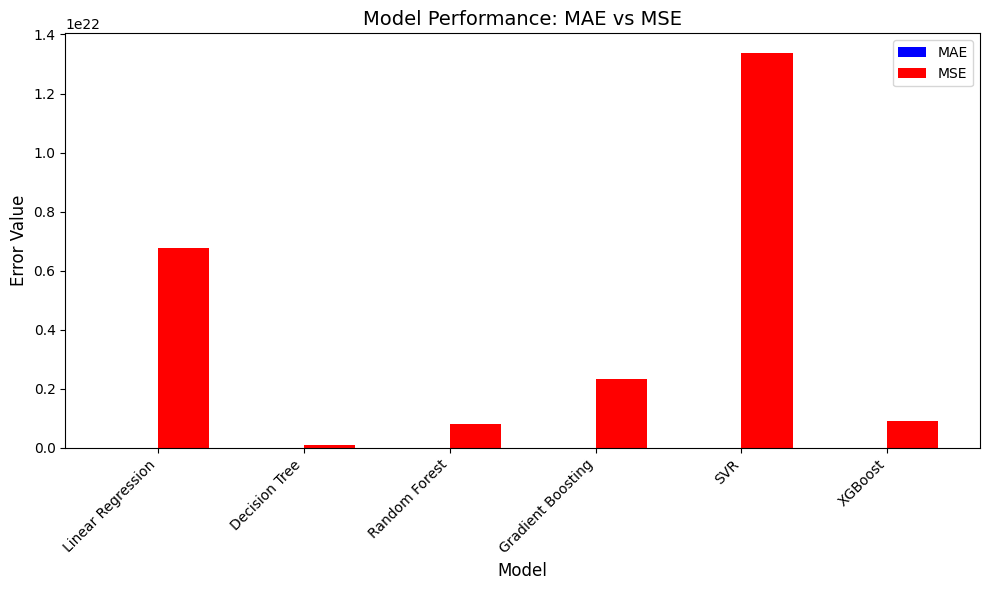

In [344]:
# Define evaluation metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost']
mae = [mae_lr, mae_dt, mae_rf, mae_gb, mae_svr, mae_xgb]  # Replace these with actual MAE values
mse = [mse_lr, mse_dt, mse_rf, mse_gb, mse_svr, mse_xgb]  # Replace these with actual MSE values

# Create a DataFrame for comparison
model_comparison = pd.DataFrame({
    'Model': models,
    'MAE': mae,
    'MSE': mse
})

# Print the comparison table
print(model_comparison)

# Create a bar chart to visualize MAE and MSE
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bars
bar_width = 0.35

# Set positions of bars
index = np.arange(len(models))

# Plot MAE and MSE as bar charts
bar1 = ax.bar(index, mae, bar_width, label='MAE', color='b')
bar2 = ax.bar(index + bar_width, mse, bar_width, label='MSE', color='r')

# Add labels, title, and legend
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Error Value', fontsize=12)
ax.set_title('Model Performance: MAE vs MSE', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.legend(fontsize=10)

# Display the plot with proper layout
plt.tight_layout()
plt.show()


1.Best Model: Decision Tree (lowest MAE and MSE, robust performance).

2.Promising Alternatives: XGBoost and Random Forest, with scope for improvement via tuning.

3.Underperforming Models: SVR and Linear Regression, due to their inability to adapt to data complexity.